In [1]:
#Import required packages
import pandas as pd
import numpy as np

Carregando o conjunto de dados em um quadro de dados usando Pandas

In [3]:
#@title
df=pd.read_csv("agricultural_raw_material[1].csv")

Explorando o conjunto de dados

In [20]:
df.info
#checking null values of each column
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

Lidar com dados ausentes, incorretos e inválidos

In [4]:
df.columns = [str(i).lower() for i in df.columns] #deixando colunas em minúsculo

#substituindo registros inválidos por null
df = df.replace('%', '', regex = True)
df = df.replace(',', '', regex = True)
df = df.replace('-', '', regex = True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

df = df.dropna() #excluindo registros inválidos

df.isnull().sum() #verificando se ainda há nulos

#convertendo para float
lst = df.columns[1:]
df[lst] = df[lst].astype('float')

df.dtypes

month                            object
coarse wool price               float64
coarse wool price % change      float64
copra price                     float64
copra price % change            float64
cotton price                    float64
cotton price % change           float64
fine wool price                 float64
fine wool price % change        float64
hard log price                  float64
hard log price % change         float64
hard sawnwood price             float64
hard sawnwood price % change    float64
hide price                      float64
hide price % change             float64
plywood price                   float64
plywood price % change          float64
rubber price                    float64
rubber price % change           float64
softlog price                   float64
softlog price % change          float64
soft sawnwood price             float64
soft sawnwood price % change    float64
wood pulp price                 float64
wood pulp price % change        float64


In [5]:
df.head()

,month,coarse wool price,coarse wool price % change,copra price,copra price % change,cotton price,cotton price % change,fine wool price,fine wool price % change,hard log price,...,plywood price,plywood price % change,rubber price,rubber price % change,softlog price,softlog price % change,soft sawnwood price,soft sawnwood price % change,wood pulp price,wood pulp price % change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Colunas de data e horacolunas

formatando a coluna datetime e definindo-a como índice para o conjunto de dados

In [6]:
df.month  = pd.to_datetime(df.month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df = df.set_index('month')

In [7]:
df.head()

,coarse wool price,coarse wool price % change,copra price,copra price % change,cotton price,cotton price % change,fine wool price,fine wool price % change,hard log price,hard log price % change,...,plywood price,plywood price % change,rubber price,rubber price % change,softlog price,softlog price % change,soft sawnwood price,soft sawnwood price % change,wood pulp price,wood pulp price % change
month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Análise Exploratória e Visualização Vamos começar importando matplotlib.pyplot e seaborn.

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


Mapa de calor

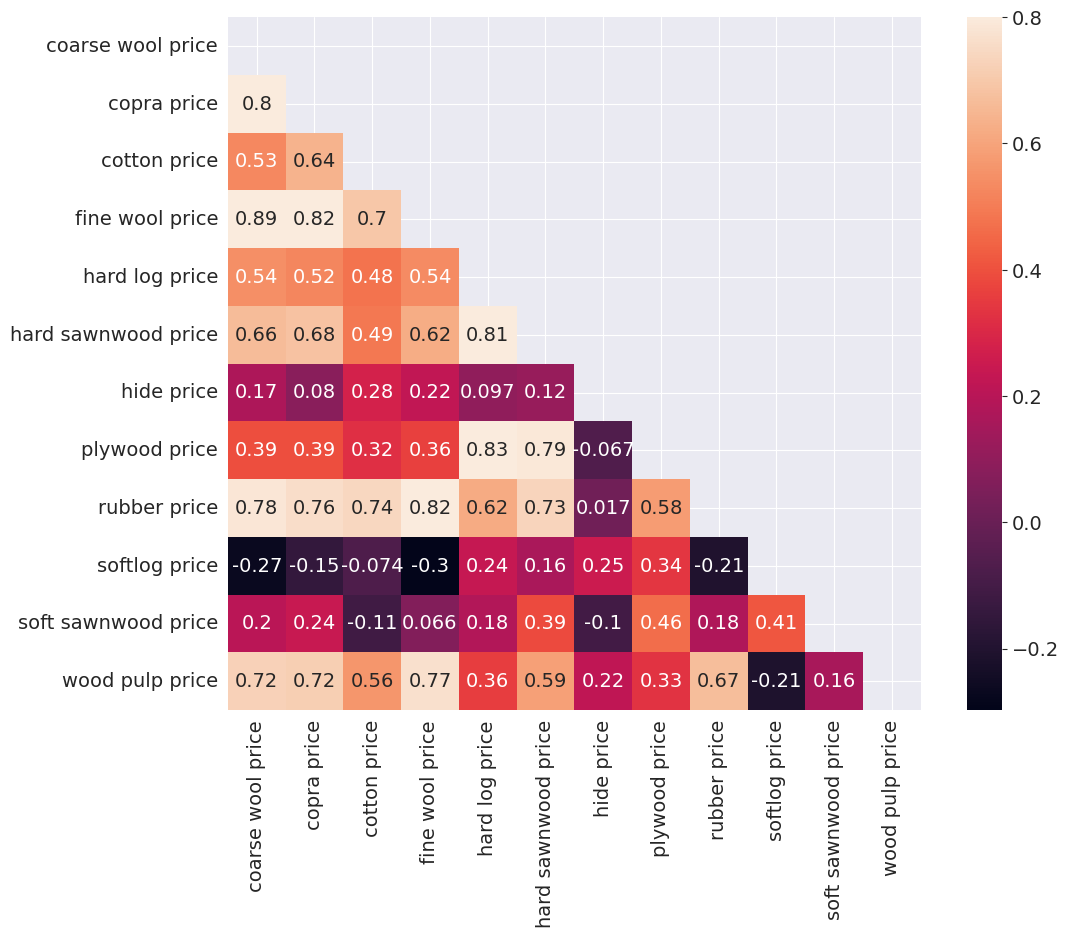

In [9]:
#raw-materials list
raw_data=['coarse wool price',  'copra price','cotton price', 'fine wool price',  'hard log price', 'hard sawnwood price',
 'hide price', 'plywood price', 'rubber price', 'softlog price', 'soft sawnwood price', 'wood pulp price']
#getting the correlation matrix
corrmat = df[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (12, 9))
#masking the upper traingle part since matrix is symmetric(repetitive)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

O mapa de calor mostra a correlação entre as matérias-primas maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente

Explore uma ou mais colunas traçando um gráfico abaixo e adicione alguma explicação sobre ele Matriz de correlação

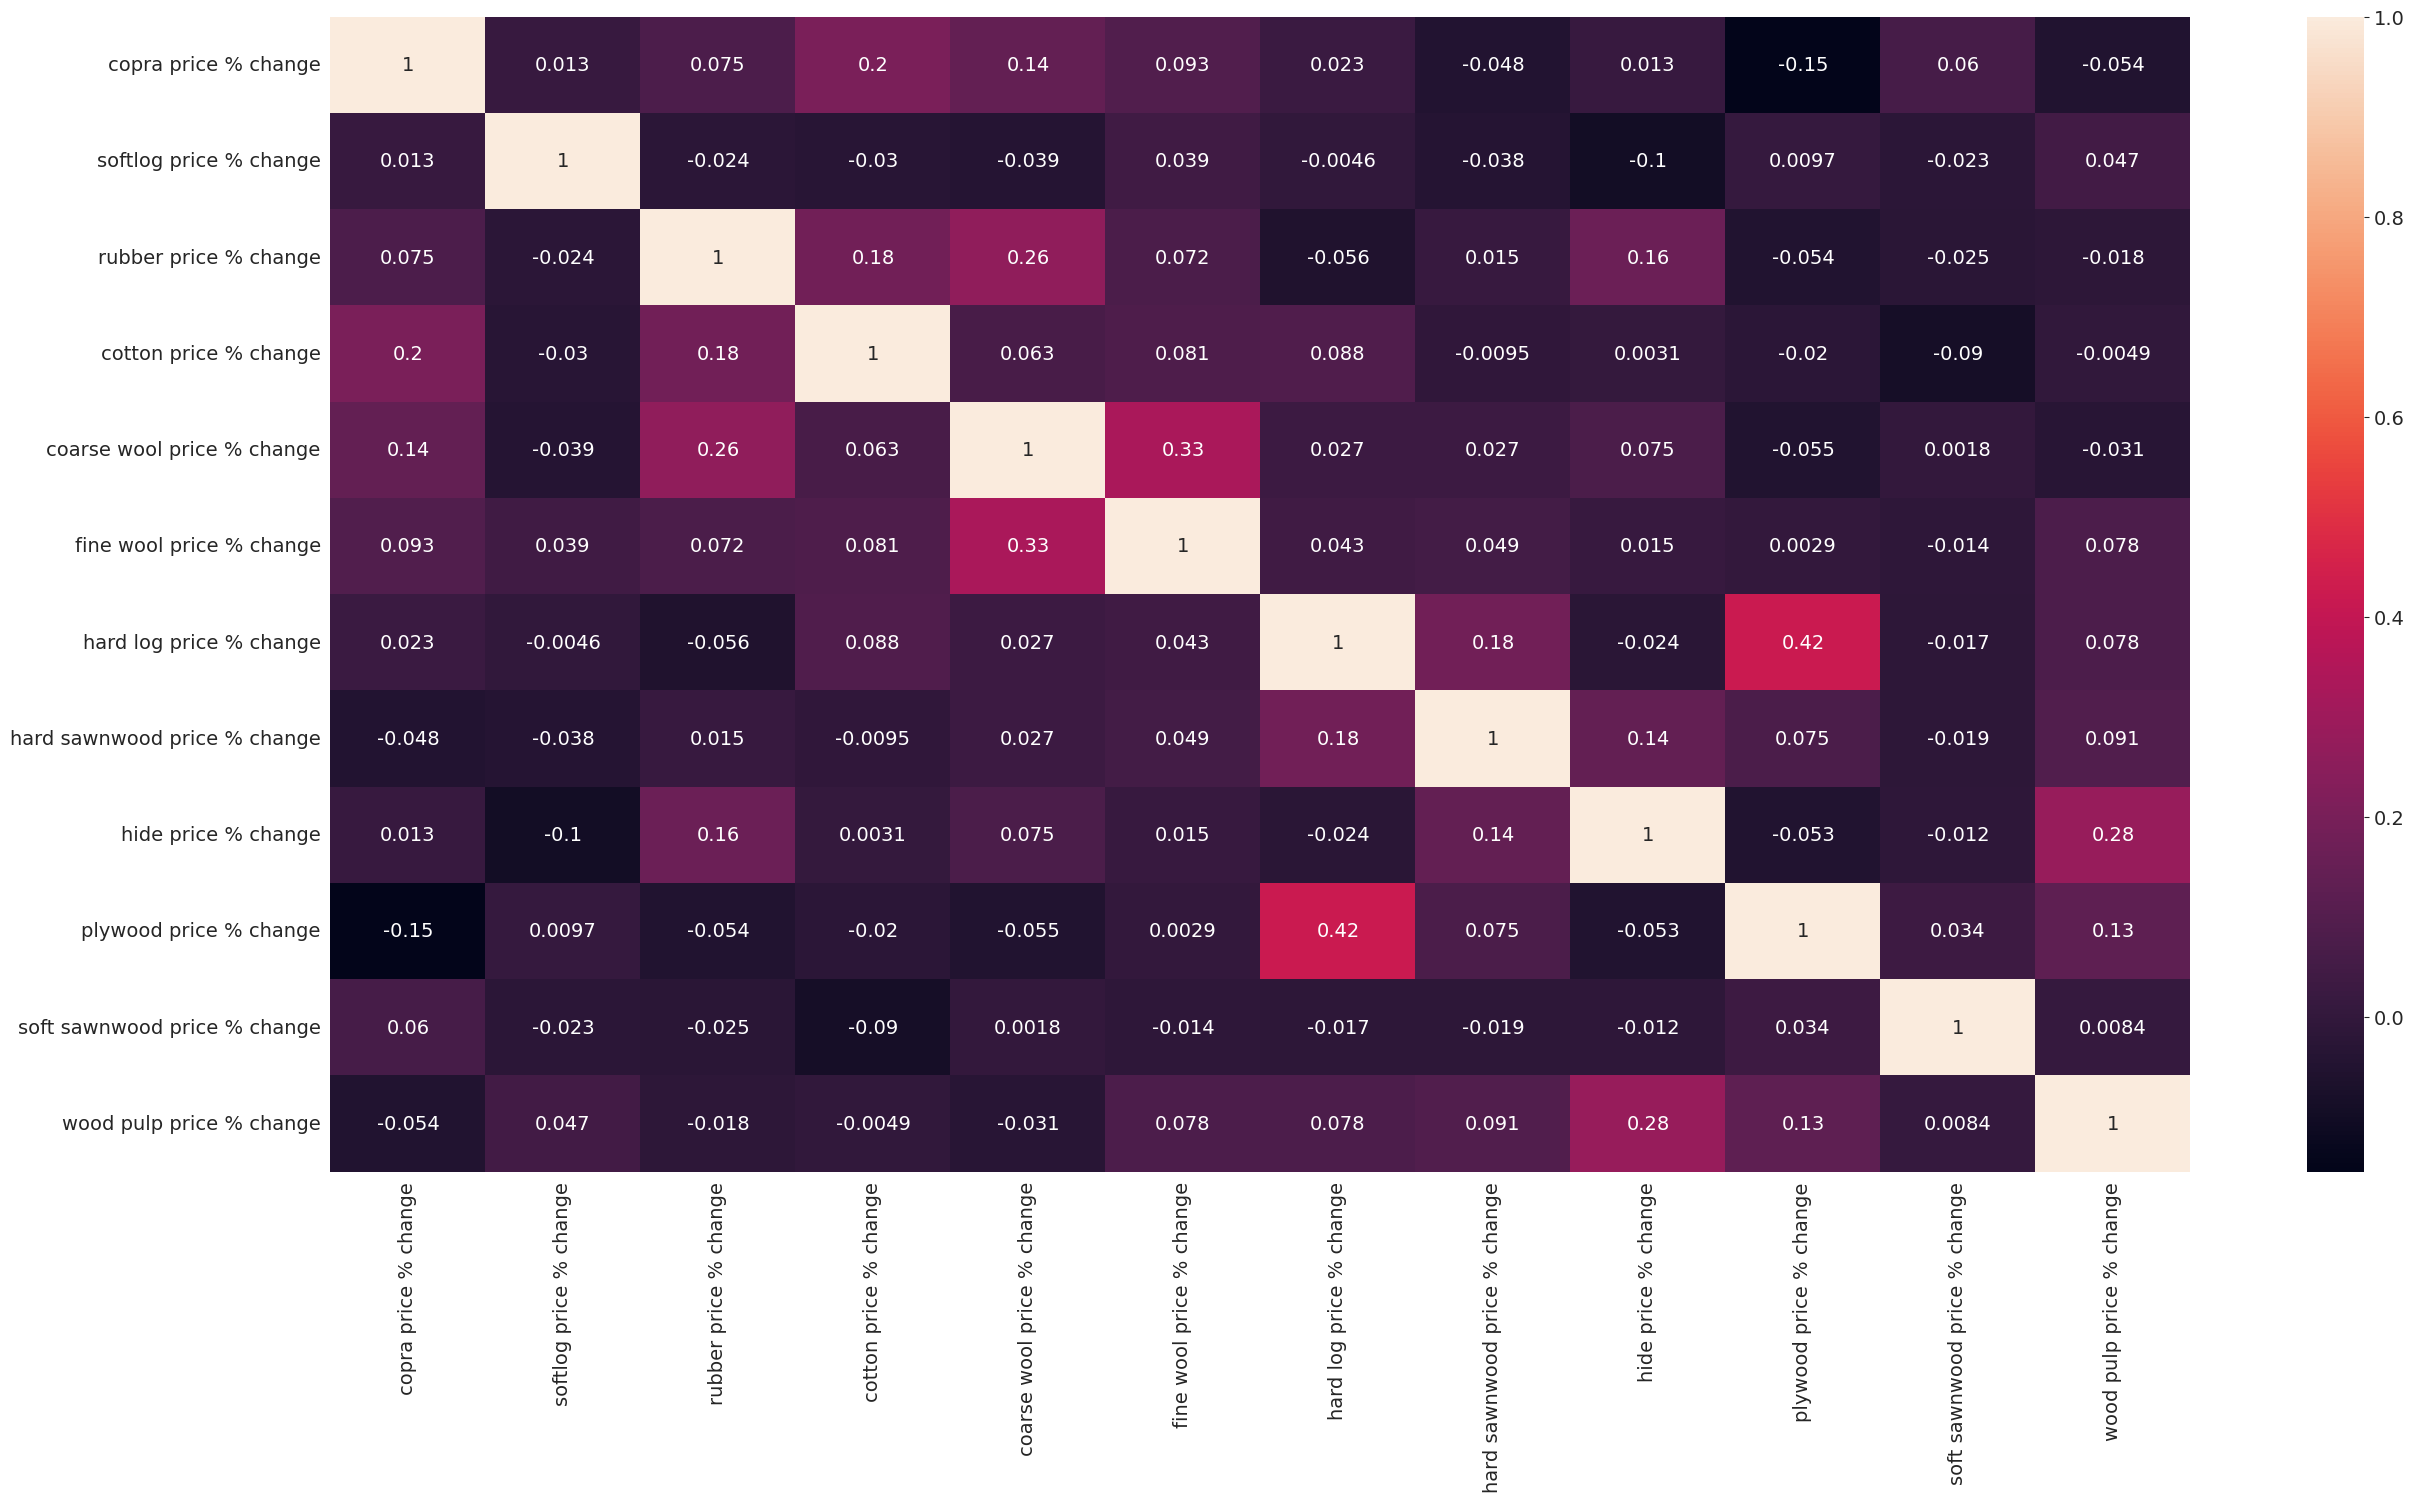

In [10]:
plt.figure(figsize=(30,15))
changelist=['copra price % change','softlog price % change','rubber price % change','cotton price % change','coarse wool price % change','fine wool price % change','hard log price % change','hard sawnwood price % change','hide price % change','plywood price % change','soft sawnwood price % change','wood pulp price % change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas

o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
Zero implica nenhuma relação
caso contrário, maior o valor maior a chance de relação. preços e seus gráficos de % de mudança

Lã grossa

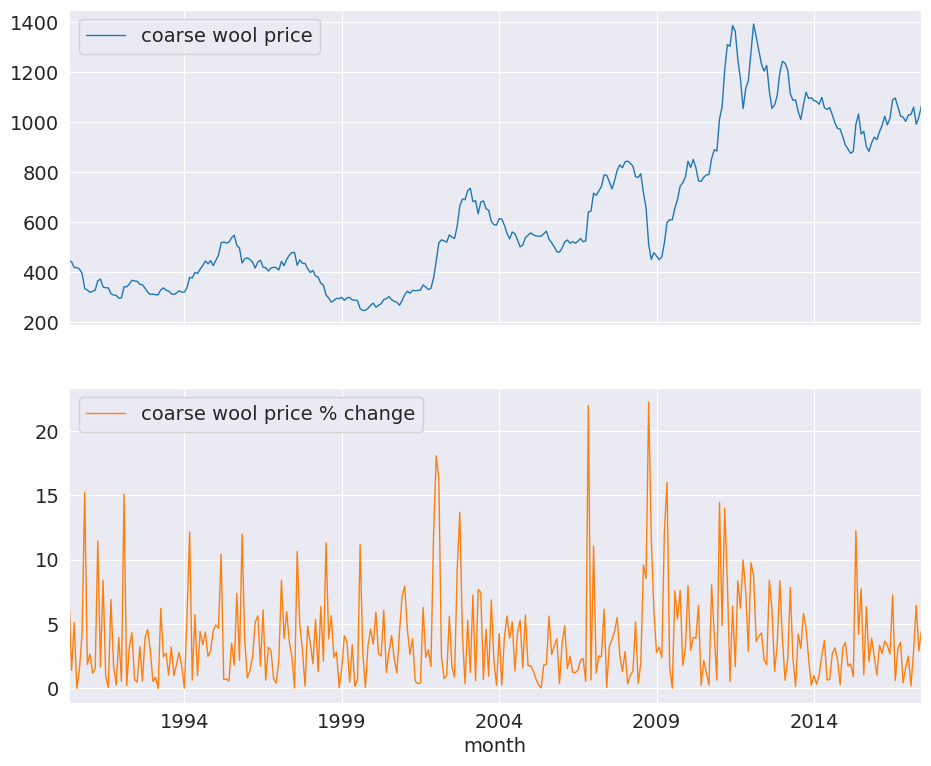

In [11]:
axes=df[["coarse wool price", "coarse wool price % change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.